# Twitter US Airlines Sentiment Analysis

In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy

In [2]:
Tweet=pd.read_csv("Tweets.csv")
Tweet.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
# Mengetahui redundant columns
print("Shape of the dataframe is",Tweet.shape)
print("The number of nulls in each column are \n", Tweet.isna().sum())

Shape of the dataframe is (14640, 15)
The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [5]:
# Mengetahui persentase null
print("Percentage null or na values in Tweet")
((Tweet.isnull() | Tweet.isna()).sum() * 100 / Tweet.index.size).round(2)

Percentage null or na values in Tweet


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [94]:
Mood_count=Tweet['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Moods')

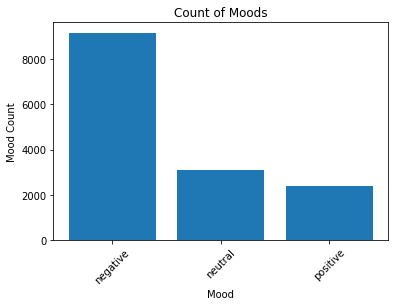

In [95]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

# **Question 2** : Find  what travelers commonly complain about in their negative review

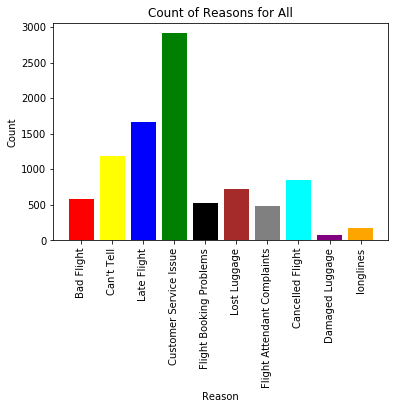

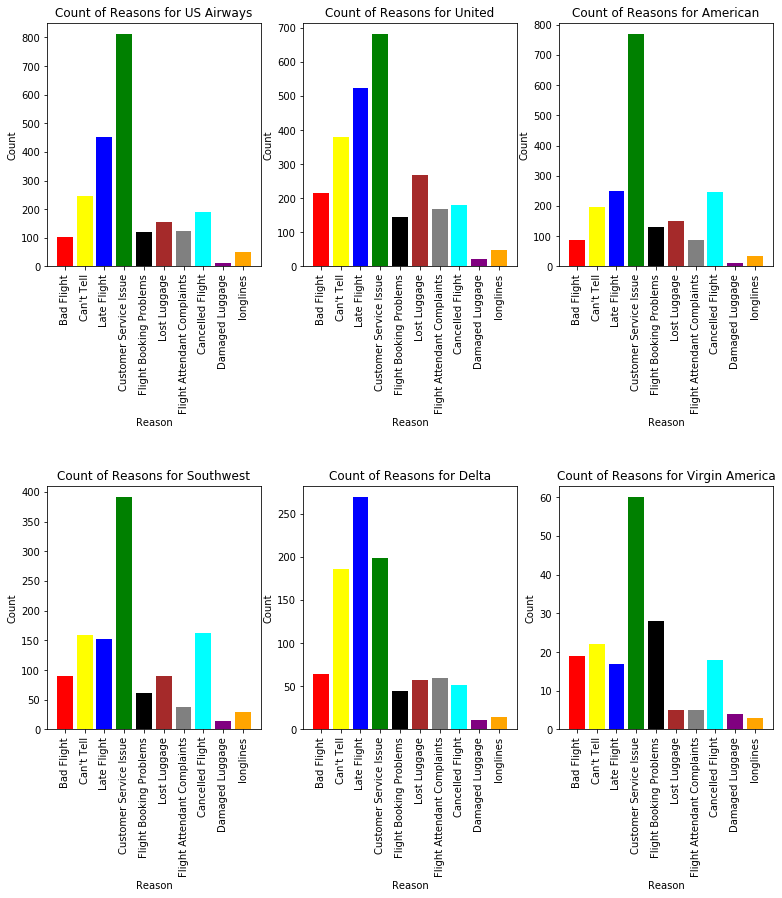

In [73]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
Tweet['negativereason'].nunique()

NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=Tweet
    else:
        a=Tweet[Tweet['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

**Alasan bad review pada Virgin America, Southwest, US Airways, United & American Airline karena customer service issue, adapun pada Delta Airline karena late flight**

In [72]:
from wordcloud import WordCloud,STOPWORDS

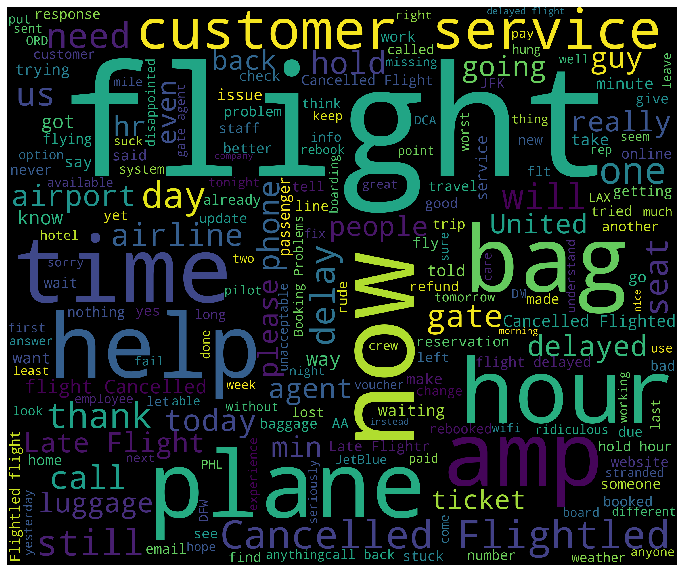

In [8]:
negative_tweet=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(negative_tweet['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Question 3**: Find  what travelers commonly  happy with in their positive review.


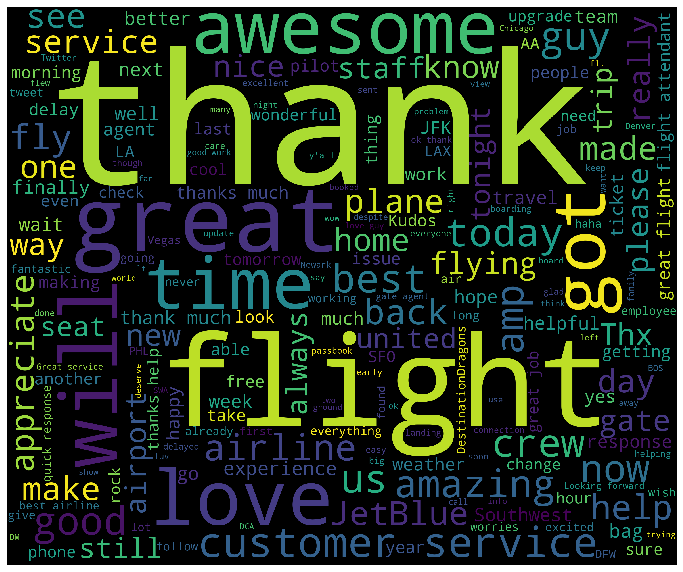

In [9]:
positive_tweet=Tweet[Tweet['airline_sentiment']=='positive']
words = ' '.join(positive_tweet['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Question 4**: Find out which airline have the most or least positive and negative review

In [10]:
# Mengetahui jumlah tweet dari setiap airline
print("Total number of tweets for each airline \n ",Tweet.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


In [11]:
# Memfilter review negatif
negative_reviews = Tweet[Tweet["airline_sentiment"].str.contains("negative")]
negative_reviews                

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


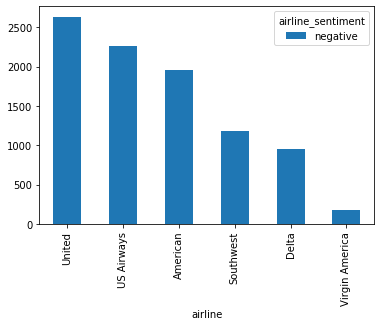

In [93]:
airline_sentiment = negative_reviews.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.sort_values("negative", ascending=False).plot(kind='bar')

**Airline yang mendapat negative review terbanyak adalah United Airline.**

In [13]:
# Memfilter review positif
positive_reviews = Tweet[Tweet["airline_sentiment"].str.contains("positive")]
positive_reviews 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,569590013278756865,positive,0.6274,NaN,0.0,American,NaN,Flora_Lola_NYC,NaN,0,@AmericanAir Love the new planes for the JFK-L...,NaN,2015-02-22 12:10:16 -0800,NaN,Eastern Time (US & Canada)
14625,569589643487928321,positive,1.0000,NaN,NaN,American,NaN,DrCaseyJRudkin,NaN,0,@AmericanAir Flight 236 was great. Fantastic c...,"[40.64946781, -73.76624703]",2015-02-22 12:08:48 -0800,East Coast,NaN
14628,569588651925098496,positive,1.0000,NaN,NaN,American,NaN,jlhalldc,NaN,0,Thank you. “@AmericanAir: @jlhalldc Customer R...,NaN,2015-02-22 12:04:51 -0800,"Washington, DC",Eastern Time (US & Canada)
14630,569588473050611712,positive,1.0000,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",NaN


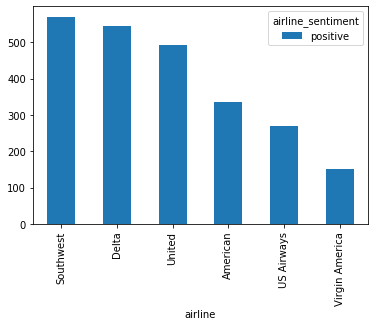

In [92]:
airline_sentiment = positive_reviews.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.sort_values("positive", ascending=False).plot(kind='bar')

**Airline yang paling banyak mendapat review positif adalah Southwest Airline**

# Classification

In [3]:
tweet= pd.read_csv("Tweets.csv")
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Preprocessing data

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from mlxtend.plotting import plot_confusion_matrix

#### Data Cleaning and Filtering

In [5]:
#Data Cleaning Function
def tweet_to_words(raw_tweet):
    #delete every char except letter 
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    #change the letters to be lowercase
    words = letters_only.lower().split()
    #set stopwords
    stops = set(stopwords.words("english"))                  
    #filtering, to get only the meaningful words
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [6]:
#add the sentiment column, set 0 if negative, set 1 if positive, set 2 if neutral
tweet['sentiment']=tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1 if x=="positive" else 2)

In [7]:
#calling data cleaning function, and apllied it to new column clean_tweet
tweet['clean_tweet']=tweet['text'].apply(lambda x: tweet_to_words(x))

#split train and tes 70%:30%
train,test = train_test_split(tweet,test_size=0.3,random_state=42)

In [9]:
train2, val = train_test_split(train,test_size=0.1,random_state=42)

In [10]:
#save to csv
train.to_csv('train2.csv',index=False)
test.to_csv('test2.csv',index=False)
val.to_csv('val.csv',index=False)

In [11]:
tweet['clean_tweet']

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minutes late flight warnin...
14637    americanair please bring american airlines bla...
14638    americanair money change flight answer phones ...
14639    americanair ppl need know many seats next flig...
Name: clean_tweet, Length: 14640, dtype: object

In [12]:
#set clean_tweet for train and val data
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
val_clean_tweet=[]
for tweet in val['clean_tweet']:
    val_clean_tweet.append(tweet)

## Mengolah data teks ke dalam vektor meggunakan CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
#learn the vocabulary dictionary and return  document-term matrix
train_features= v.fit_transform(train_clean_tweet)
#transfer documents to document-term matrix
val_features=v.transform(val_clean_tweet)

### Import Machine Learning Libraries

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
Classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    ]

Accuracy of KNeighborsClassifieris 0.7375609756097561
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       550
           1       0.64      0.80      0.71       133
           2       0.77      0.50      0.60       342

    accuracy                           0.74      1025
   macro avg       0.72      0.72      0.71      1025
weighted avg       0.74      0.74      0.73      1025



<Figure size 432x288 with 0 Axes>

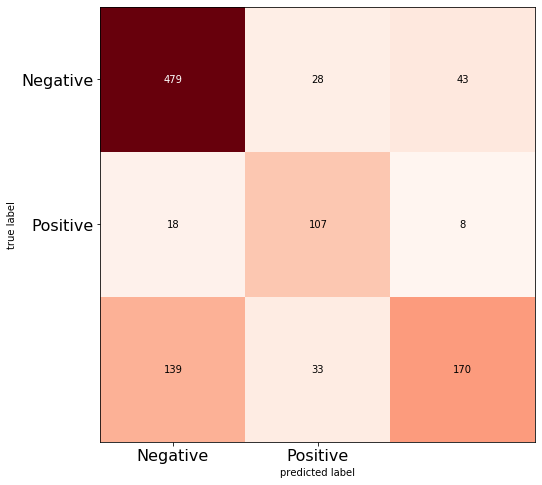

Accuracy of DecisionTreeClassifieris 0.9951219512195122
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       0.99      0.98      0.99       170
           2       0.98      1.00      0.99       218

    accuracy                           1.00      1025
   macro avg       0.99      0.99      0.99      1025
weighted avg       1.00      1.00      1.00      1025



<Figure size 432x288 with 0 Axes>

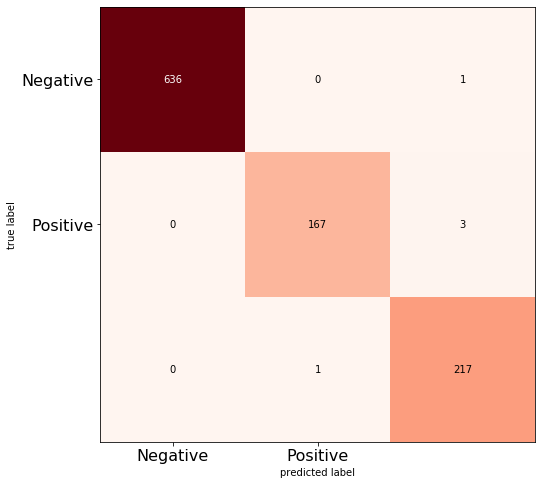

Accuracy of RandomForestClassifieris 0.9960975609756098
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       636
           1       0.99      0.98      0.99       170
           2       0.99      1.00      0.99       219

    accuracy                           1.00      1025
   macro avg       0.99      0.99      0.99      1025
weighted avg       1.00      1.00      1.00      1025



<Figure size 432x288 with 0 Axes>

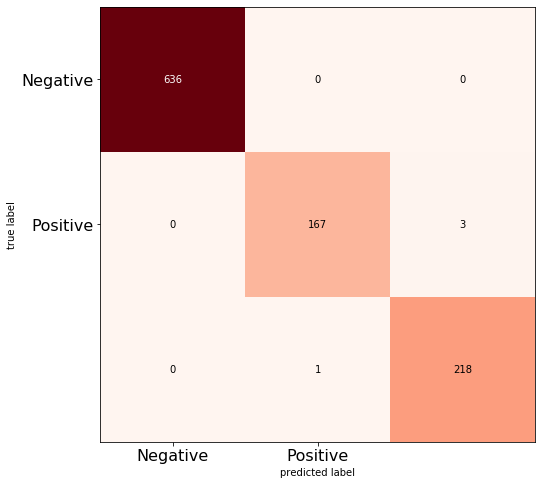

In [16]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(train_features,train['sentiment'])
    pred = fit.predict(val_features)
    conf = confusion_matrix(pred,val['sentiment'])
    report = classification_report(pred,val['sentiment'])
    accuracy = accuracy_score(pred,val['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(report)
    plt.figure()
    plot_confusion_matrix(conf, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Positive', 'Neutral'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Positive', 'Neutral'], fontsize=16)
    plt.show()

Text(0.5, 1.0, 'Accuracies of Models on Validation Data')

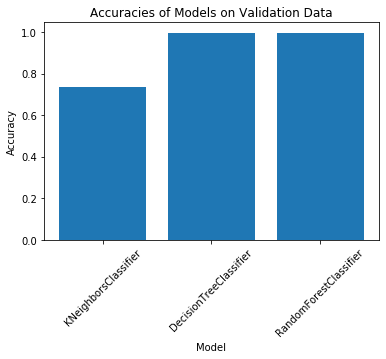

In [17]:
Index = [1,2,3]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models on Validation Data')

### Testing data with the best model

In [18]:
rf = RandomForestClassifier(n_estimators=200)

In [20]:
test['clean_tweet']

4794     southwestair early frontrunner best airline os...
10480    usairways flt ewr cancelled flightled yet flts...
8067     jetblue going bdl dca flights yesterday today ...
8880                           jetblue depart washington c
8292                          jetblue probably find ticket
                               ...                        
12156                                   americanair thanks
6518     southwestair guys must swamped even took corpo...
2245     united airline cancelled flightled flights tom...
4165     united website flight booking problems experie...
11671    usairways cant get reservations take look hour...
Name: clean_tweet, Length: 4392, dtype: object

In [21]:
#set clean_tweet for test data
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [23]:
test_features=v.transform(test_clean_tweet)

Accuracy of testing data with best model (Random Forest Classifier) : 0.7663934426229508
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      3136
           1       0.61      0.75      0.67       562
           2       0.45      0.58      0.51       694

    accuracy                           0.77      4392
   macro avg       0.65      0.71      0.68      4392
weighted avg       0.79      0.77      0.78      4392



<Figure size 432x288 with 0 Axes>

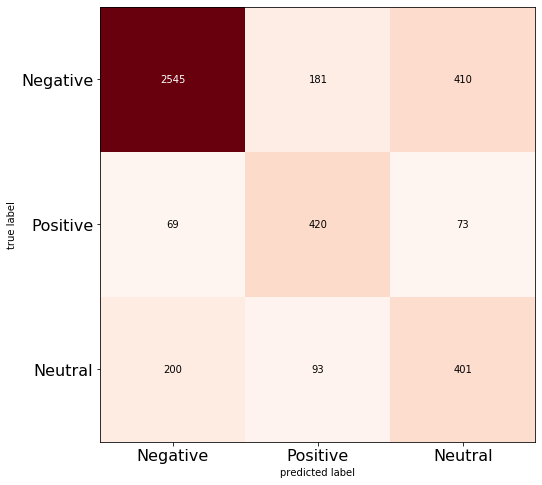

In [24]:
Accuracy=[]
Model=[]

fit = rf.fit(train_features,train['sentiment'])
pred = fit.predict(test_features)
conf = confusion_matrix(pred,test['sentiment'])
report = classification_report(pred,test['sentiment'])
accuracy = accuracy_score(pred,test['sentiment'])
Accuracy.append(accuracy)

print('Accuracy of testing data with best model (Random Forest Classifier) : '+ str(accuracy))
print(report)
plt.figure()
plot_confusion_matrix(conf, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Positive', 'Neutral'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Positive', 'Neutral'], fontsize=16)
plt.show()

## Menggunakan Hyperparameter Tuning untuk Random Forest Classifier

In [38]:
from pprint import pprint

In [40]:
rf = RandomForestClassifier(n_estimators=200)

In [41]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [46]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 32, 55, 77, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 650, 1100, 1550, 2000]}


In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 5 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features,train['sentiment'])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 12.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [51]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [53]:
rf_best = rf_random.best_estimator_

Accuracy of Random Forest is 0.7752732240437158
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3222
           1       0.59      0.77      0.67       531
           2       0.45      0.62      0.52       639

    accuracy                           0.78      4392
   macro avg       0.65      0.73      0.68      4392
weighted avg       0.81      0.78      0.79      4392



<Figure size 432x288 with 0 Axes>

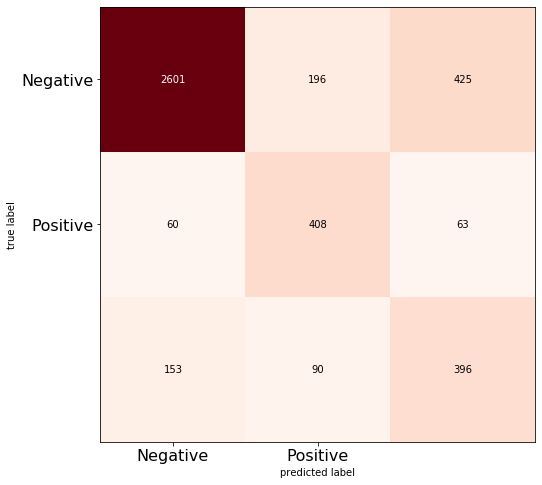

In [54]:
pred = rf_best.predict(test_features)
conf = confusion_matrix(pred,test['sentiment'])
report = classification_report(pred,test['sentiment'])
accuracy = accuracy_score(pred,test['sentiment'])
Accuracy.append(accuracy)
Model.append(classifier.__class__.__name__)
print('Accuracy of '+"Random Forest "+'is '+str(accuracy))
print(report)
plt.figure()
plot_confusion_matrix(conf, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Positive', 'Neutral'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Positive', 'Neutral'], fontsize=16)
plt.show()

### Save the best model

In [56]:
import joblib

In [57]:
filename = "best_model.sav"
joblib.dump(rf_random, filename)

['best_model.sav']

## Apply the best model on new tweets

In [58]:
#new positive tweets
new_positive_tweets = pd.Series(["Thank you @VirginAmerica for you amazing customer support team on Tuesday 11/28 at @EWRairport and returning my lost bag in less than 24h! #efficiencyiskey #virginamerica"
,"Love flying with you guys ask these years. Sad that this will be the last trip 😂 @VirginAmerica #LuxuryTravel"
,"Wow @VirginAmerica main cabin select is the way to fly!! This plane is nice and clean & I have tons of legroom! Wahoo! NYC bound! ✈️"])

df_model_pos = new_positive_tweets.apply(lambda x: tweet_to_words(x))

In [59]:
testing_clean_tweet=[]
for tweet in df_model_pos:
    testing_clean_tweet.append(tweet)

testing_features=v.transform(testing_clean_tweet)
df_model_pos = testing_features

In [60]:
df_model_pos

<3x11125 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [61]:
#load the model
loaded_model = joblib.load("best_model.sav")
res = loaded_model.predict(df_model_pos).tolist()

In [62]:
res

[1, 1, 0]

## Testing csv file

In [63]:
test_tweet= pd.read_csv("test_data.csv")
test_tweet.head()

,tweet_id,text
0,569731104070115329,@SouthwestAir you're my early frontrunner for ...
1,569263373092823040,@USAirways how is it that my flt to EWR was Ca...
2,568818669024907264,@JetBlue what is going on with your BDL to DCA...
3,567775864679456768,@JetBlue do they have to depart from Washingto...
4,568526521910079488,@JetBlue I can probably find some of them. Are...


In [64]:
test_tweet['clean_tweet']=test_tweet['text'].apply(lambda x: tweet_to_words(x))
test_tweet['clean_tweet']

0       southwestair early frontrunner best airline os...
1       usairways flt ewr cancelled flightled yet flts...
2       jetblue going bdl dca flights yesterday today ...
3                             jetblue depart washington c
4                            jetblue probably find ticket
                              ...                        
4387                                   americanair thanks
4388    southwestair guys must swamped even took corpo...
4389    united airline cancelled flightled flights tom...
4390    united website flight booking problems experie...
4391    usairways cant get reservations take look hour...
Name: clean_tweet, Length: 4392, dtype: object

In [65]:
test_clean_tweet=[]
for tweet in test_tweet['clean_tweet']:
    test_clean_tweet.append(tweet)

test_features=v.transform(test_clean_tweet)

In [66]:
loaded_model = joblib.load("best_model.sav")
res = loaded_model.predict(test_features).tolist()

In [67]:
res

[1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,


In [68]:
test_tweet["class"] = res

In [69]:
test_tweet

,tweet_id,text,clean_tweet,class
0,569731104070115329,@SouthwestAir you're my early frontrunner for ...,southwestair early frontrunner best airline os...,1
1,569263373092823040,@USAirways how is it that my flt to EWR was Ca...,usairways flt ewr cancelled flightled yet flts...,0
2,568818669024907264,@JetBlue what is going on with your BDL to DCA...,jetblue going bdl dca flights yesterday today ...,0
3,567775864679456768,@JetBlue do they have to depart from Washingto...,jetblue depart washington c,2
4,568526521910079488,@JetBlue I can probably find some of them. Are...,jetblue probably find ticket,2
...,...,...,...,...
4387,570274148364242947,@AmericanAir thanks!,americanair thanks,1
4388,567804718886711296,"@SouthwestAir You guys must have been swamped,...",southwestair guys must swamped even took corpo...,0
4389,569298744337788928,@united we are the airline that has Cancelled ...,united airline cancelled flightled flights tom...,0
4390,567798174946172928,@united Your website Flight Booking Problems e...,united website flight booking problems experie...,0


In [70]:
test_tweet['sentiment']=test_tweet['class'].apply(lambda x: "negative" if x==0 else "positive" if x==1 else "neutral")
test_tweet

,tweet_id,text,clean_tweet,class,sentiment
0,569731104070115329,@SouthwestAir you're my early frontrunner for ...,southwestair early frontrunner best airline os...,1,positive
1,569263373092823040,@USAirways how is it that my flt to EWR was Ca...,usairways flt ewr cancelled flightled yet flts...,0,negative
2,568818669024907264,@JetBlue what is going on with your BDL to DCA...,jetblue going bdl dca flights yesterday today ...,0,negative
3,567775864679456768,@JetBlue do they have to depart from Washingto...,jetblue depart washington c,2,neutral
4,568526521910079488,@JetBlue I can probably find some of them. Are...,jetblue probably find ticket,2,neutral
...,...,...,...,...,...
4387,570274148364242947,@AmericanAir thanks!,americanair thanks,1,positive
4388,567804718886711296,"@SouthwestAir You guys must have been swamped,...",southwestair guys must swamped even took corpo...,0,negative
4389,569298744337788928,@united we are the airline that has Cancelled ...,united airline cancelled flightled flights tom...,0,negative
4390,567798174946172928,@united Your website Flight Booking Problems e...,united website flight booking problems experie...,0,negative


In [71]:
test_tweet.to_csv("test_result.csv")